In [1]:
%matplotlib inline
import sys
sys.path.append('..')

import numpy as np
from hist import Hist
import matplotlib.pyplot as plt
import mplhep as hep
from gadget4hep.plot import StatError
from gadget4hep.plot import Ratio1D
from gadget4hep.plot import Ratio1DStatError
from gadget4hep.plot import Efficiency1D

In [2]:
np.random.seed(1337)
hep.style.use(hep.styles.CMS)

# StatError

In [3]:
h_mc = Hist.new.Regular(20, 100, 150).Double()
h_mc.fill(125 + 10 * np.random.randn(1000))

Hist(Regular(20, 100, 150, label='Axis 0'), storage=Double()) # Sum: 988.0 (1000.0 with flow)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x14dc59f00>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

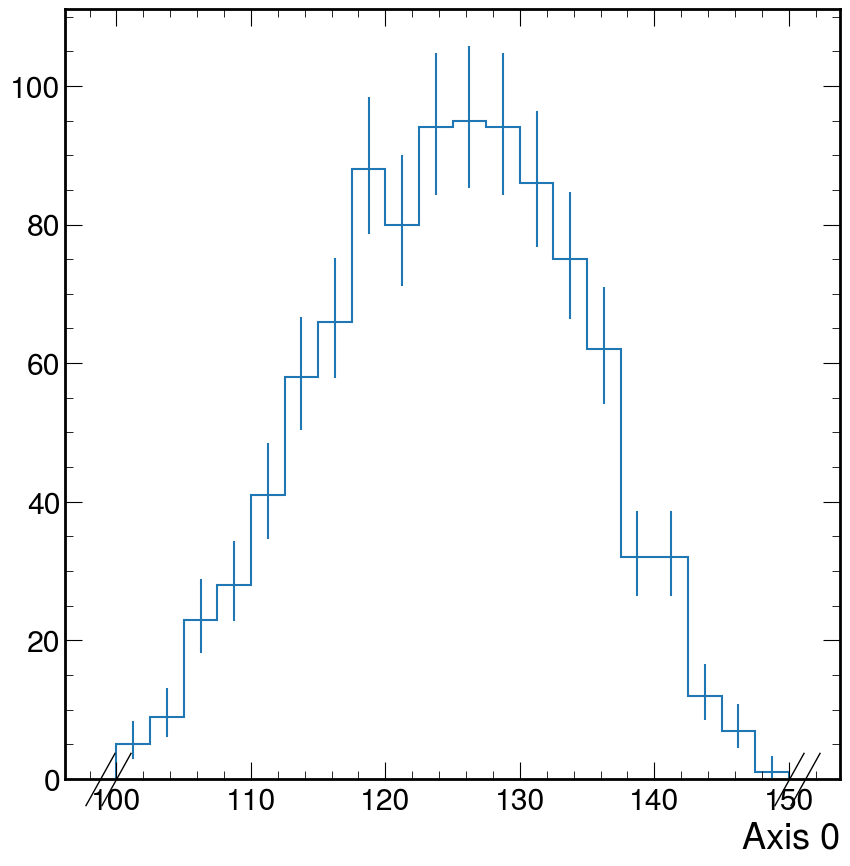

In [4]:
h_mc.plot(yerr=True)

In [5]:
mc_stat_err = StatError.from_hist(h_mc)

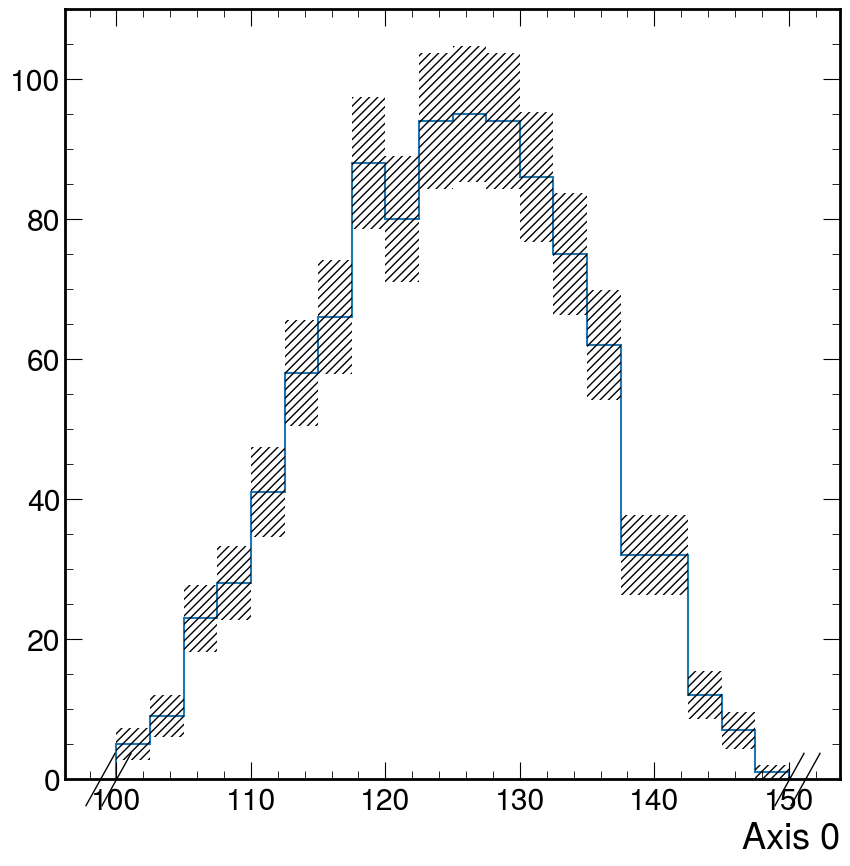

In [6]:
fig, ax = plt.subplots()
h_mc.plot(ax=ax, yerr=False)
mc_stat_err.plot(ax=ax)

# Ratio

In [7]:
h_data = Hist.new.Regular(20, 100, 150).Double()
h_data.fill(125 + 10 * np.random.randn(1000))

Hist(Regular(20, 100, 150, label='Axis 0'), storage=Double()) # Sum: 991.0 (1000.0 with flow)

In [8]:
data_mc_ratio = Ratio1D.from_hist(data_hist=h_data, mc_hist=h_mc)

(exptext: Custom Text(0.0, 1, ''),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation'))

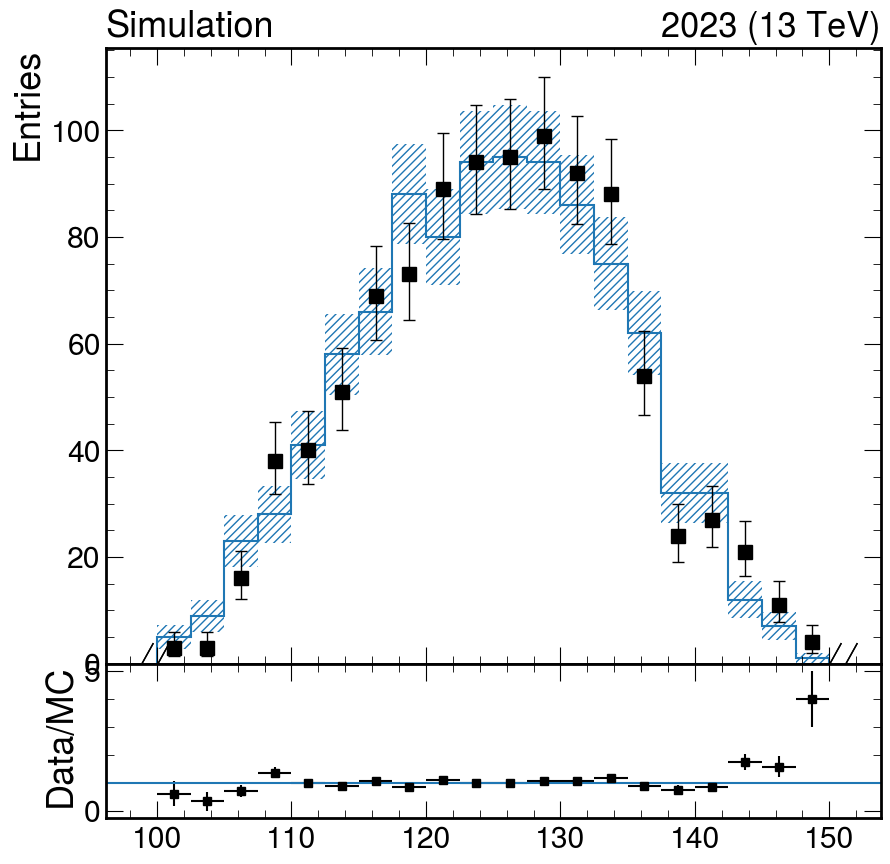

In [9]:
fig, (ax_dist, ax_ratio) = plt.subplots(nrows=2, height_ratios=(4, 1), sharex=True)
fig.subplots_adjust(hspace=0)


data_hist_plot_kwargs = dict(
    label='Data',
    color='black',
    histtype='errorbar',
    marker='s',
    markersize=10,
    capsize=4,
    density=False
)

h_data.plot(ax=ax_dist, **data_hist_plot_kwargs)
h_mc.plot(ax=ax_dist, yerr=False)
mc_stat_err.plot(ax=ax_dist, edgecolor='tab:blue')
ax_dist.set_ylabel('Entries')

data_mc_ratio.plot(ax=ax_ratio)
ax_ratio.axhline(1)
ax_ratio.set_ylabel('Data/MC')

hep.label.exp_label(ax=ax_dist, year=2023)

# Efficiency

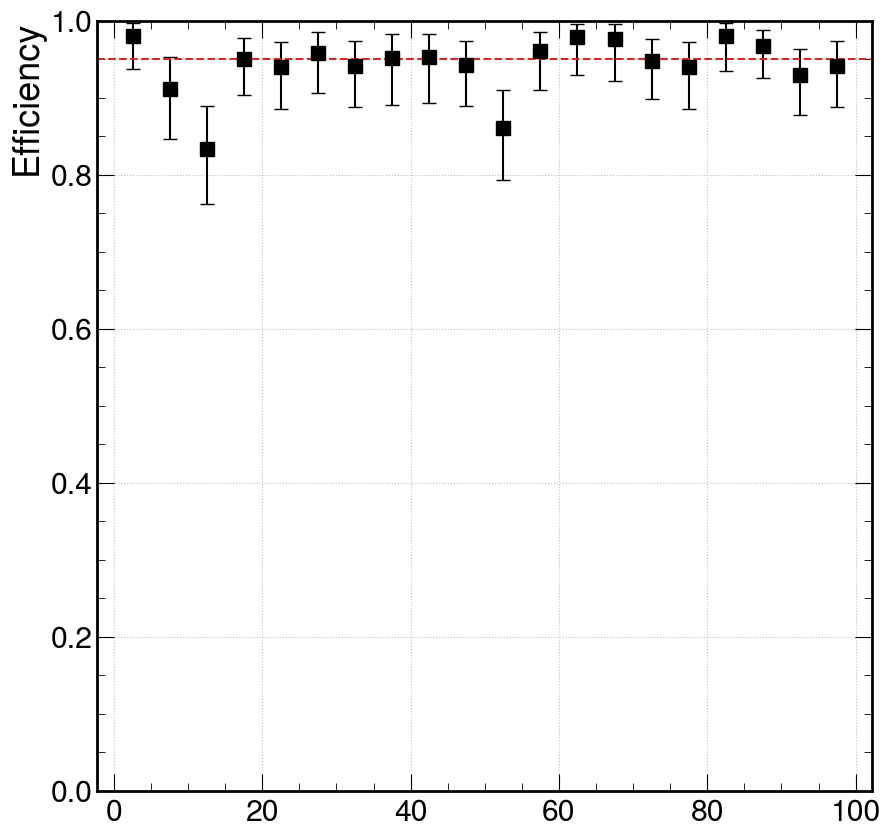

In [10]:
h_den = Hist.new.Regular(20, 0, 100).Double()
h_num = Hist.new.Regular(20, 0, 100).Double()

x = np.random.uniform(low=0, high=100, size=1000)
num_mask = np.random.rand(1000) < 0.95

h_den.fill(x)
h_num.fill(x[num_mask])

eff = Efficiency1D.from_hist(h_den=h_den, h_num=h_num)

fig, ax = plt.subplots()
eff.plot(ax=ax, ls='', marker='s', capsize=5, markersize=10, color='black')
ax.axhline(0.95, color='tab:red', ls='--')

ax.set_ylim(0, 1.0)

ax.set_ylabel('Efficiency')
ax.grid()